<a href="https://colab.research.google.com/github/Sharik2610/Yes_Bank_Stock_Price_closing_prediction/blob/main/personal_colab_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Yes Bank Stock Closing Price Prediction**

## **(Supervised - Regression)**

147272-yes-bank-share-price-reuters.avif

#**Project summary**


#Yes Bank is a well-known financial institution in the Indian domain. Since 2018, it has consistently made headlines due to fluctuations in its stock prices attributed to events involving the company's founder, Rana Kapoor. Given this context, there is a significant interest in assessing how such occurrences impact the bank's stock prices and whether predictive models, including time series methods, can effectively address such situations.

#The dataset at hand encompasses monthly stock price records of Yes Bank since its inception. It covers a range of metrics, including monthly closing, opening, highest, and lowest stock prices. The primary aim of this project is to construct models capable of predicting the closing price of the bank's stock for a given month.

#This project carries a pivotal significance, as accurately predicting Yes Bank's stock prices is a crucial task for a multitude of stakeholders, investors, and market participants. Yes Bank's prominence in the private sector banking industry in India has been coupled with challenges like high levels of non-performing assets and involvement in fraudulent activities. These challenges have prompted regulatory intervention by the Reserve Bank of India, rendering the prediction of Yes Bank's stock prices intricate and uncertain.

#To address this intricate challenge, the project harnesses a comprehensive dataset spanning from the inception of the bank. It aims to develop predictive models that adeptly capture the nuanced dynamics and trends in Yes Bank's stock prices, while accounting for the unpredictable events and market turbulence tied to the bank's performance.

#The project methodology entails the deployment of a diverse array of modeling techniques. The objective is to rigorously evaluate the performance of these models in accurately forecasting the closing price of Yes Bank's stock. Furthermore, the efficacy of the models lies in their capacity to incorporate the impact of significant events, such as instances of fraud involving the bank's founders or regulatory interventions by the Reserve Bank of India.

#By successfully accomplishing the prediction of Yes Bank's stock closing prices, this project stands to provide invaluable insights. These insights can significantly aid stakeholders in making well-informed decisions related to their investments in the bank. The project's broader purpose is to navigate the intricate landscape of Yes Bank's stock prices, unravel the complexities inherent in its financial performance, and ultimately empower decision-makers with the tools for sound judgment

#**Data Science Problem Statement**
---
#Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.



#**Github link-**  https://github.com/Sharik2610/Yes_Bank_Stock_Price_closing_prediction

#**Importing Libraries**

In [ ]:
# importing the required libraries

import warnings    # do not disturb mode
warnings.filterwarnings('ignore')


import numpy as np   # numerical computations
import pandas as pd  # Data Manupulation

import matplotlib.pyplot as plt  # visualize with plots
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import scipy.stats as stats   # statistics

from datetime import datetime   # to convert to date

from sklearn.model_selection import train_test_split   # split train and test data

from sklearn.compose import ColumnTransformer #  transformation

from sklearn.preprocessing import StandardScaler,MinMaxScaler # scale the data

from sklearn.preprocessing import FunctionTransformer,PowerTransformer

from sklearn.preprocessing import PolynomialFeatures  #Higher-Dimensional

from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso # regression model

from sklearn.model_selection import GridSearchCV, cross_val_score # hyperparameters tunning

from sklearn.pipeline import Pipeline  # creating pipeline
from sklearn.pipeline import make_pipeline  # make pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,accuracy_score # import required metrics
#from sklearn.model_selection import cross_val_score


# **Dataset Loading**

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# Defining file path
file_path =('/content/drive/MyDrive/AlmaBetter/Capstone/data_YesBank_StockPrices.csv')
df=pd.read_csv(file_path)

#**Dataset FirstView**

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Dataset last five row look

df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Dataset Rows & Columns count
print(f'There are total {df.shape[0]} rows and {df.shape[1]} columns.')

There are total 185 rows and 5 columns.


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


* we have no null values
*  Date column is of 'object' datatype we have to convert it to 'datetime'.
* Data type of Open ,High,Low ,Close columns are 'float64' we have to convert it into 'integer'.

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
# Dataset Duplicate Value Count
No_of_duplicate_rows=df[df.duplicated()].shape[0]
print(f'we hve total no {No_of_duplicate_rows} duplicate rows.')

we hve total no 0 duplicate rows.


Having no duplicate values makes the dataset easier for us to work with.

#**Data Visualisation**

In [ ]:
# 3-D visualisation of data set


# Define spatial coordinates
x = df['Open']
y = df['Low']
z = df['High']

# Choose an attribute for coloring (e.g., 'Close' values)
attribute = df['Close']

# Create a 4D scatter plot using Plotly
scatter = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    marker=dict(
        size=8,
        color=attribute,
        colorscale='Viridis',  # Choose a suitable colorscale
        opacity=0.8
    ),
    mode='markers'
)

layout = go.Layout(
    scene=dict(
        xaxis_title='Open',
        yaxis_title='Close',
        zaxis_title='High'
    )
)

fig = go.Figure(data=[scatter], layout=layout)
fig.show()


In [ ]:
# Visualizing yesbank stock Opening price over the time.
fig = px.line(df, df['Date'], df['Open'], title='Monthly Opening price')


# Customize x-axis and y-axis labels
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Open price'),
    autosize=False,
    width=1600,
    height=500)

# display updated figure
fig.show()

In [ ]:
# Visualizing yesbank stock closing price over the time.

fig = px.line(df, df['Date'], df['Close'], title='Monthly Closing price')

# Customize x-axis and y-axis labels
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Close price'),
    autosize=False,
    width=1600,
    height=500)

# display updated figure
fig.show()

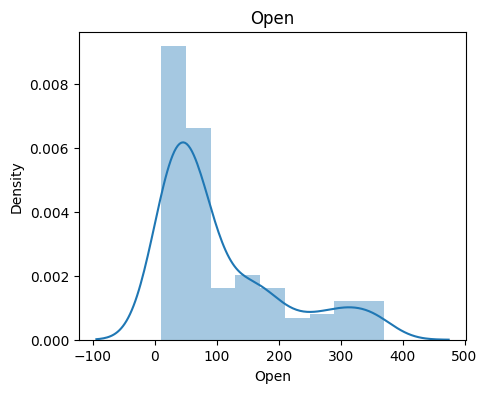

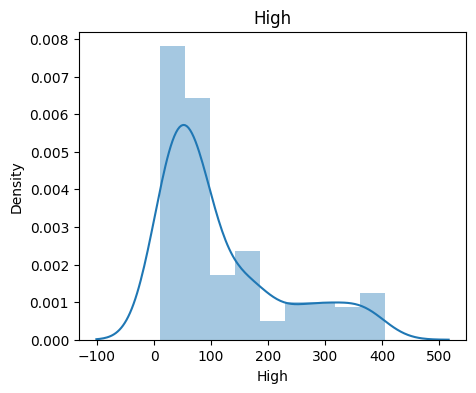

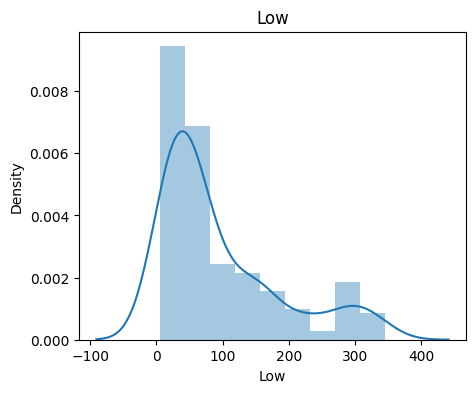

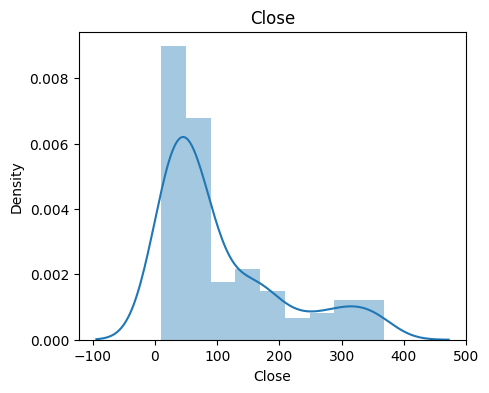

In [ ]:
#plots for data distribution
df1=df.copy() # creating data frame copy

df1.set_index("Date",inplace=True) # set index of data frame


for col in df1.columns:
  plt.figure(figsize=(5,4)) # set figure size
  sns.distplot(df1[col])  #plot distplot
  plt.title(col)          # set up plot title


Since our data is skewed, so we will perform some transformations during regression analysis

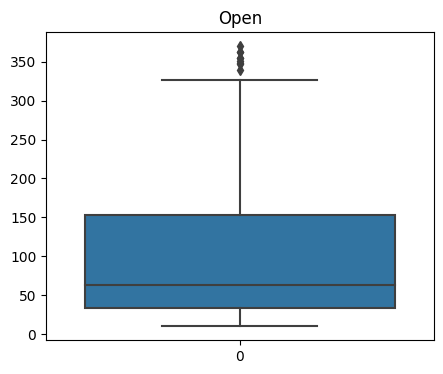

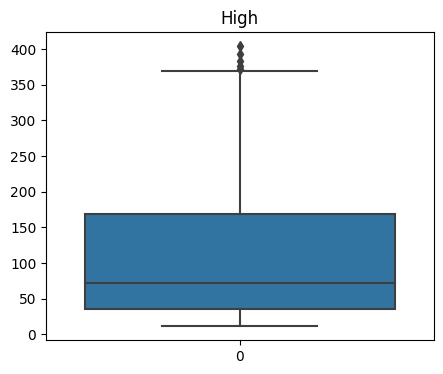

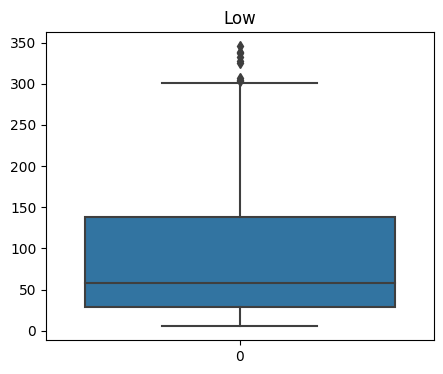

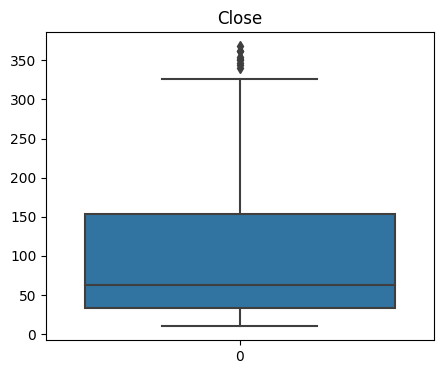

In [ ]:
##  checking the outlier in Dataset with the help of box whisker plot
for col in df1.columns:
  plt.figure(figsize=(5,4)) # set figure size
  sns.boxplot(df1[col])  # plot box plot
  plt.title(col)         # set up plot title


*  Above plot shows that there are some outliers in our dataset.
*  To handle outliers, various approaches can be employed, such as removing them from the dataset, transforming the data using robust statistical techniques, or imputing them with more representative values. The choice of the method depends on the nature of the data and the specific requirements of the analysis.

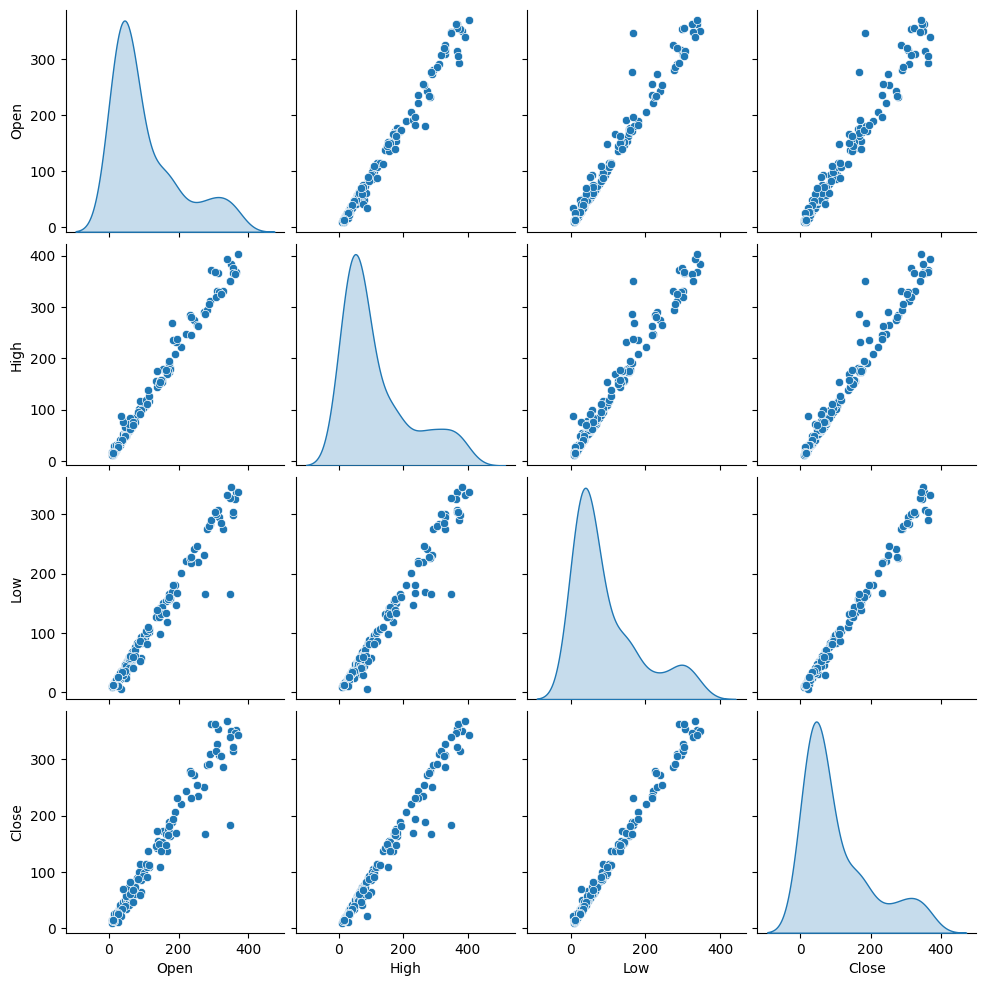

In [ ]:
 #Visualizing the pair plot
sns.pairplot(df,diag_kind='kde')  #plot pair plot
plt.show()                        # Display figure

*  A pair plot graph is used for analyzing the Yes Bank stock price because it helps explore relationships, detect patterns and trends, and identify outliers..
It allows for correlation analysis and understanding of data distributions.
*  Above graph shows that our data is not normally distributed. So,We will
transform the data to bring it into a normal distribution.

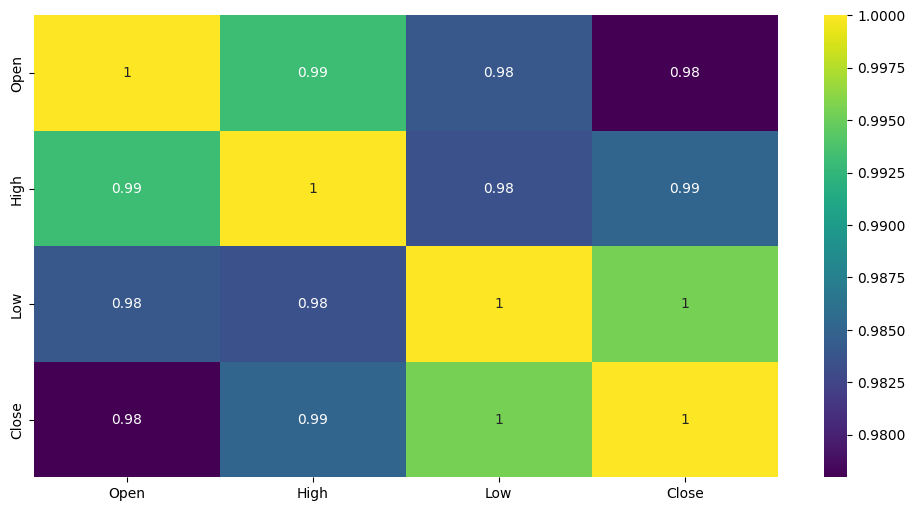

In [ ]:
## Our first step to check multicollinearity
plt.figure(figsize=(12,6))                                #setup figure size
sns.heatmap(df.corr(), annot = True, cmap='viridis')      #plot heat map
plt.show()                                                # display figure

*  From the above plot,it is very significant that there is high collinearity.Each and every feature is correlated with every other feature.(i.e. Multicollinearity)
*  
The gained insights are useful to understand and get an idea about the collinearity of the features so that we could deal with it in future model implentation.

#**Date Preprocessing**

In [ ]:
#copying data to preserve orignal file
data = df.copy()

In [ ]:
# convert string object to datetime object
date_series = data['Date']
date_format = '%b-%y'  # Example format (YYYY-MM-DD)
data['Date'] = date_series.apply(lambda x: datetime.strptime(x, date_format))


In [ ]:
#set date as index
data.set_index('Date',inplace=True)

In [ ]:
#check if changes are being reflected
data

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


In [ ]:
#convert dtype float to integer

data= data.iloc[:,:5].astype(int)

In [ ]:
#check if changes are being reflected
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Open    185 non-null    int64
 1   High    185 non-null    int64
 2   Low     185 non-null    int64
 3   Close   185 non-null    int64
dtypes: int64(4)
memory usage: 7.2 KB


In [ ]:
#applying log tranform
transformed_df = np.log(data)

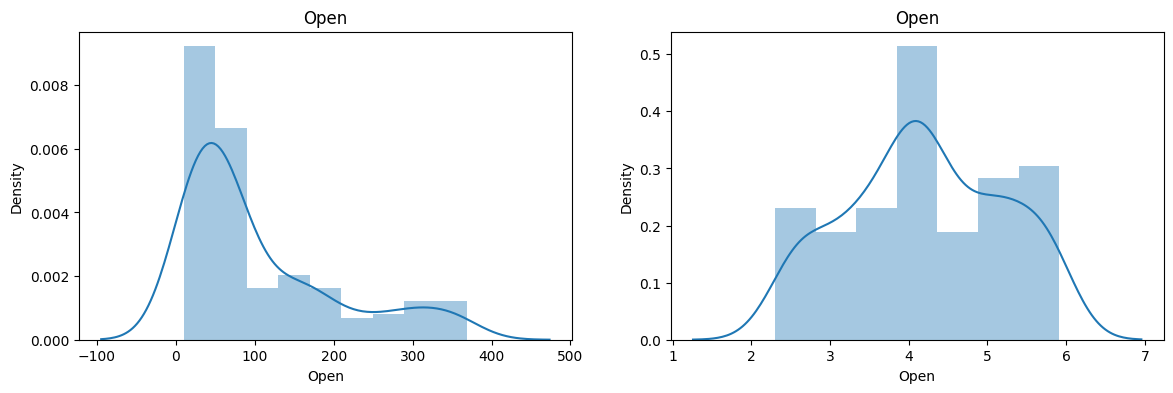

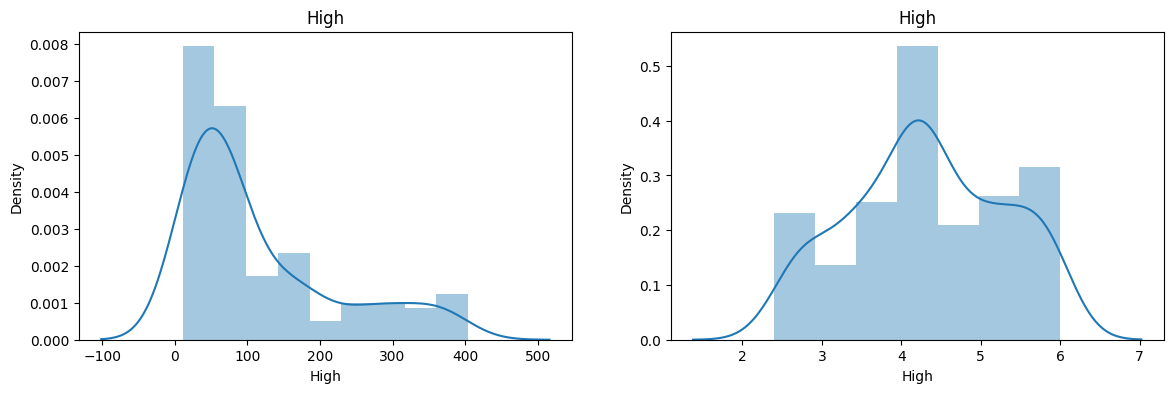

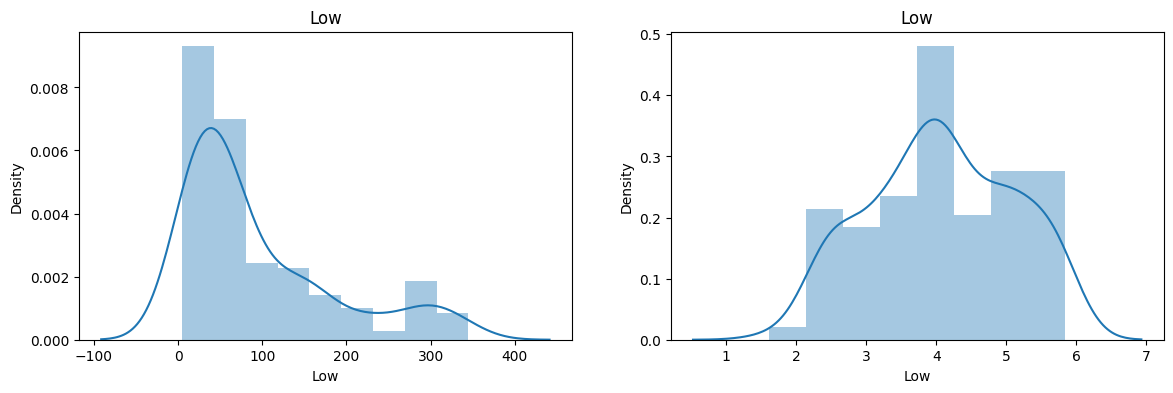

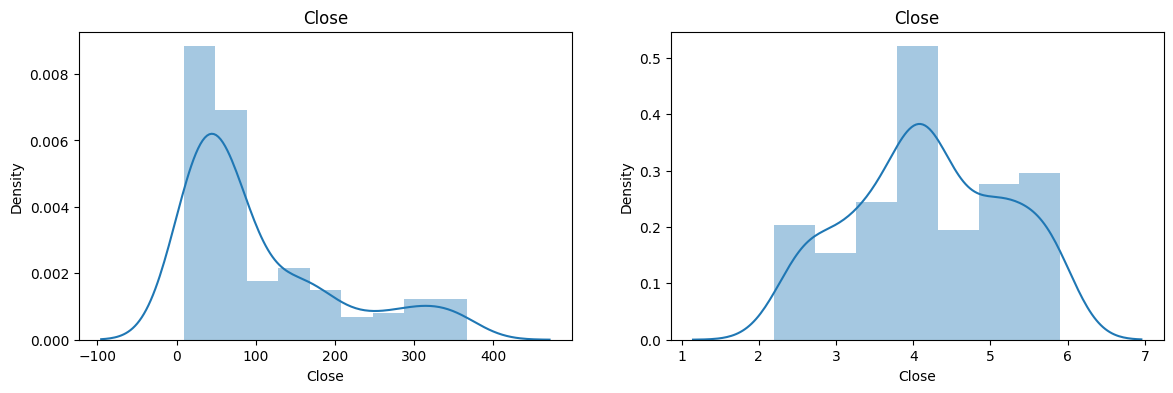

In [ ]:
#plots for dependent variable before and after doing tranformation
transformed_df = pd.DataFrame(transformed_df,columns=data.columns)

for col in transformed_df.columns:
    plt.figure(figsize=(14,4)) # setup figure size

    plt.subplot(1,2,1)         #plot first subplot
    sns.distplot(data[col])    #plot dist plot

    plt.title(col)             #set up plot title



    plt.subplot(1,2,2)                   #plot second subplot

    sns.distplot(transformed_df[col])    #plot distplot

    plt.title(col)                       # set up plot title

    plt.show()                           #display figure

#**Let's start**

In [ ]:
#Train/Test/Split

X_train,X_test,Y_train,Y_test = train_test_split(data.drop(columns=['Close']),data['Close'],test_size=0.2,
                                                random_state=10)
print(X_train.shape,X_test.shape)

print(Y_train.shape , Y_test.shape)

(148, 3) (37, 3)
(148,) (37,)


#**Building Model**

# 1.linear regression

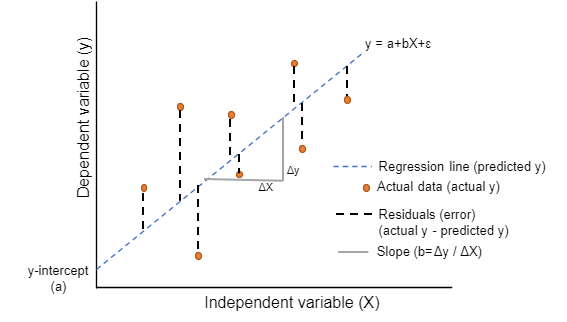

In [ ]:
# create a column transformer
trf1 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,4))
])

In [ ]:
#create a function transformer
trf2 = FunctionTransformer(func=np.log1p)

In [ ]:
# polynomial
trf3=PolynomialFeatures(degree=2)

In [ ]:
trf4 = LinearRegression()

In [ ]:
# merging pipe line
pipe = make_pipeline(trf1,trf2,trf3,trf4)

In [ ]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 4, None))])),
                ('functiontransformer',
                 FunctionTransformer(func=<ufunc 'log1p'>)),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
# make predictions
y_pred = pipe.predict(X_test)

In [ ]:
# check train and test accuracy
train_accuracy = round(pipe.score(X_train,Y_train),4)
test_accuracy = round(pipe.score(X_test,Y_test),4)
cross_val= cross_val_score(pipe,X_train,Y_train,cv=10).mean()

In [ ]:
#print train and test accuracy score
print('train_accuracy',train_accuracy)
print('test_accuracy',test_accuracy)
print('cross_val',cross_val)

train_accuracy 0.9955
test_accuracy 0.9975
cross_val 0.9846818373534383


In [ ]:
# evaluate predictions
MAE = round(mean_absolute_error(Y_test,y_pred),4)
print("MAE :" ,MAE)

MSE  = round(mean_squared_error(Y_test,y_pred),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

R2_score =round(r2_score(Y_test,y_pred),3)
print('R2_score:',R2_score)

MAE : 3.1911
MSE : 18.7575
RMSE : 4.331
R2_score: 0.998


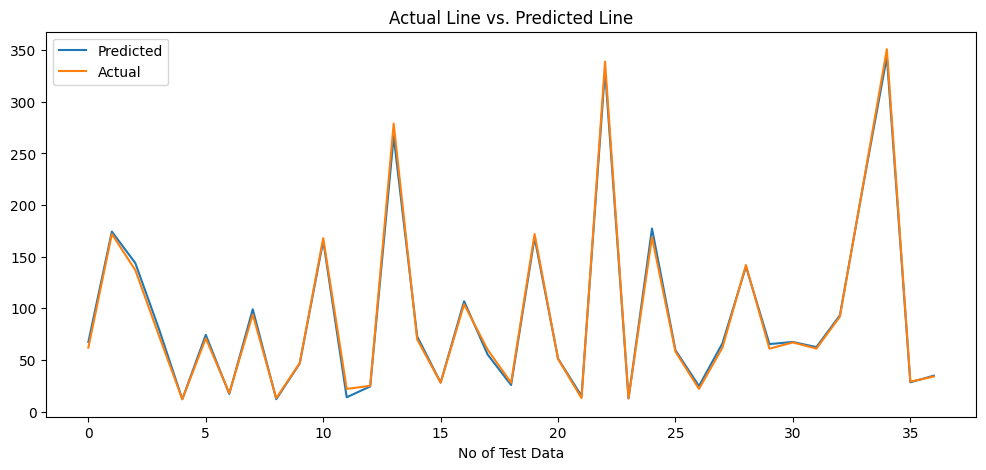

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(12,5)) #set up figure size
plt.plot(y_pred)           # plot predicted value
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data') #set x-axis lable
plt.title('Actual Line vs. Predicted Line') # set plot title
plt.show()  # display figure

# 2.Ridge Regression

In [ ]:
# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaling
    ('poly_features', PolynomialFeatures()),  # Polynomial features
    ('model', Ridge())  # Ridge regression model
])

In [ ]:
# Defining Hyperparameter Grid
Param_grid = {
    'scaler__feature_range': [(0, 1), (0, 2), (0, 3)],  # Min-Max scaling range
    'poly_features__degree': [2, 3, 4, 5 ,8],  # Degree of polynomial features
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

In [ ]:
#Perform Hyperparameter Tuning with GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=Param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'poly_features__degree': [2, 3, 4, 5, 8],
                         'scaler__feature_range': [(0, 1), (0, 2), (0, 3)]},
             scoring='accuracy')

In [ ]:
#Print the Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'model__alpha': 0.001, 'poly_features__degree': 2, 'scaler__feature_range': (0, 1)}


In [ ]:
#select best model
best_model = grid_search.best_estimator_

In [ ]:
# make predictions
Ridg_pred = best_model.predict(X_test)

In [ ]:
# check train and test accuracy
Ridge_train_accuracy = round(best_model.score(X_train,Y_train),4)
Ridge_test_accuracy = round(best_model.score(X_test,Y_test),4)
Ridge_cross_val= cross_val_score(best_model,X_train,Y_train,cv=10).mean()

In [ ]:
#print train and test accuracy score
print('train_accuracy',Ridge_train_accuracy)
print('test_accuracy',Ridge_test_accuracy)
print('cross_val',Ridge_cross_val)

train_accuracy 0.9951
test_accuracy 0.9968
cross_val 0.992880717431257


In [ ]:
# evaluate predictions
Ridge_MAE = round(mean_absolute_error(Y_test,Ridg_pred),4)
print("MAE :" ,Ridge_MAE)

Ridge_MSE  = round(mean_squared_error(Y_test,Ridg_pred),4)
print("MSE :" , Ridge_MSE)

Ridge_RMSE = round(np.sqrt(Ridge_MSE),4)
print("RMSE :" ,Ridge_RMSE)

Ridge_R2_score =round(r2_score(Y_test,Ridg_pred),3)
print('R2_score:',Ridge_R2_score)

MAE : 3.5155
MSE : 24.1035
RMSE : 4.9095
R2_score: 0.997


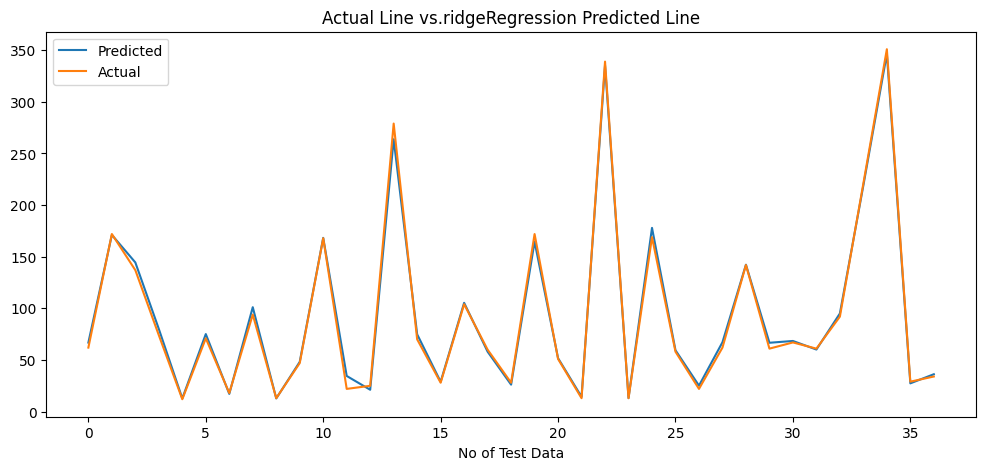

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(12,5))  #set figure size
plt.plot(Ridg_pred)           # plot predicted value
plt.plot(np.array(Y_test))  #plot actual value
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')  # set X-axis lable
plt.title('Actual Line vs.ridgeRegression Predicted Line') # set plot title
plt.show()                                  # figure display

#3.Lasso Regression

In [ ]:
# Create a pipeline with preprocessing and the model
pipeline1 = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaling
    ('poly_features', PolynomialFeatures()),  # Polynomial features
    ('Function_transformer', FunctionTransformer()),
    ('model', Lasso())  # Lasso regression model
])

In [ ]:
param_grid1 = {

    'poly_features__degree': [2, 3, 4, 5,6,8],  # Degree of polynomial features
    'scaler__feature_range': [(0, 1), (0, 2)],  # MinMaxScaler's feature_range
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 10, 100,],#  regularization strength

}


In [ ]:
#Perform Hyperparameter Tuning with GridSearchCV
grid_search1= GridSearchCV(pipeline1, param_grid=param_grid1, cv=5, scoring='neg_mean_squared_error' )
grid_search1.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('Function_transformer',
                                        FunctionTransformer()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 10, 100],
                         'poly_features__degree': [2, 3, 4, 5, 6, 8],
                         'scaler__feature_range': [(0, 1), (0, 2)]},
             scoring='neg_mean_squared_error')

In [ ]:
#Print the Best Hyperparameters
print("Best Hyperparameters:", grid_search1.best_params_)
best_model1 = grid_search1.best_estimator_

Best Hyperparameters: {'model__alpha': 0.1, 'poly_features__degree': 6, 'scaler__feature_range': (0, 2)}


In [ ]:
#make prediction
Lasso_pred = best_model1.predict(X_test)

In [ ]:
train_accuracy_lasso = round(best_model1.score(X_train,Y_train),4)
test_accuracy_lasso  = round(best_model1.score(X_test,Y_test),4)
cross_val_lasso = cross_val_score(best_model1,X_train,Y_train,cv=10).mean()

In [ ]:
print('train_accuracy',train_accuracy_lasso )
print('test_accuracy',test_accuracy_lasso )
print('cross_val',cross_val_lasso )

In [ ]:
# evaluate prediction
L_MAE = round(mean_absolute_error(Y_test,Lasso_pred),4)
print("MAE :" ,L_MAE)

L_MSE  = round(mean_squared_error(Y_test,Lasso_pred),4)
print("MSE :" , L_MSE)

L_RMSE = round(np.sqrt(L_MSE),4)
print("RMSE :" ,L_RMSE)

L_R2_score = round(r2_score(Y_test,Lasso_pred),3)
print('R2_score:',L_R2_score)

MAE : 4.642
MSE : 41.9046
RMSE : 6.4734
R2_score: 0.994


#4. Elasticnet Regression

In [ ]:
def log_transform(X):
    return np.log1p(X)

In [ ]:
# Create a pipeline with preprocessing and the model
pipeline2 = Pipeline([
    ('scaler', MinMaxScaler()),  # Min-Max scaling
    ('log_transform', FunctionTransformer()),  # Logarithmic transform
    ('poly_features', PolynomialFeatures()),  # Polynomial features
    ('model',ElasticNet())  # Ridge regression model
])

In [ ]:
param_grid2 = {

    'poly_features__degree': [2, 3, 4, 5,6,8],  # Degree of polynomial features
    'scaler__feature_range': [(0, 1), (0, 2)],  # MinMaxScaler's feature_range
    'log_transform__func': [np.log1p, np.log, np.log10], # Transformation function choices
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100] , #  regularization strength
    'model__l1_ratio': [ 0.05,0.10, 0.15, 0.20, 0.25, 0.30, 0.35,0.40,0.45,0.50]  #  L1 ratio
}

In [ ]:
#Perform Hyperparameter Tuning with GridSearchCV
grid_search2 = GridSearchCV(pipeline2, param_grid=param_grid2, cv=5, scoring='accuracy')
grid_search2.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log_transform', FunctionTransformer()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('model', ElasticNet())]),
             param_grid={'log_transform__func': [<ufunc 'log1p'>, <ufunc 'log'>,
                                                 <ufunc 'log10'>],
                         'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__l1_ratio': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3,
                                             0.35, 0.4, 0.45, 0.5],
                         'poly_features__degree': [2, 3, 4, 5, 6, 8],
                         'scaler__feature_range': [(0, 1), (0, 2)]},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters and evaluate the model
print("Best Hyperparameters:", grid_search2.best_params_)
best_model2 = grid_search2.best_estimator_


Best Hyperparameters: {'log_transform__func': <ufunc 'log1p'>, 'model__alpha': 0.001, 'model__l1_ratio': 0.05, 'poly_features__degree': 2, 'scaler__feature_range': (0, 1)}


In [ ]:
#make prediction
ElasticNet_pred = best_model2.predict(X_test)

In [ ]:
# check train and test accuracy
train_accuracy_ElasticNet = round(best_model2.score(X_train,Y_train),4)
test_accuracy_ElasticNet = round(best_model2.score(X_test,Y_test),4)
cross_val_ElasticNet= cross_val_score(best_model2,X_train,Y_train,cv=5).mean()

In [ ]:
#print train and test accuracy score
print('train_accuracy',train_accuracy_ElasticNet )
print('test_accuracy',test_accuracy_ElasticNet )
print('cross_val',cross_val_ElasticNet )

train_accuracy 0.9912
test_accuracy 0.9936
cross_val 0.9841639334138094


In [ ]:
# evaluate prediction
E_MAE = round(mean_absolute_error(Y_test,ElasticNet_pred),4)
print("MAE :" ,E_MAE)

E_MSE  = round(mean_squared_error(Y_test,ElasticNet_pred),4)
print("MSE :" , E_MSE)

E_RMSE = round(np.sqrt(E_MSE),4)
print("RMSE :" ,E_RMSE)

E_R2_score = round(r2_score(Y_test,ElasticNet_pred),3)
print('R2_score:',E_R2_score)

MAE : 4.6783
MSE : 48.3118
RMSE : 6.9507
R2_score: 0.994


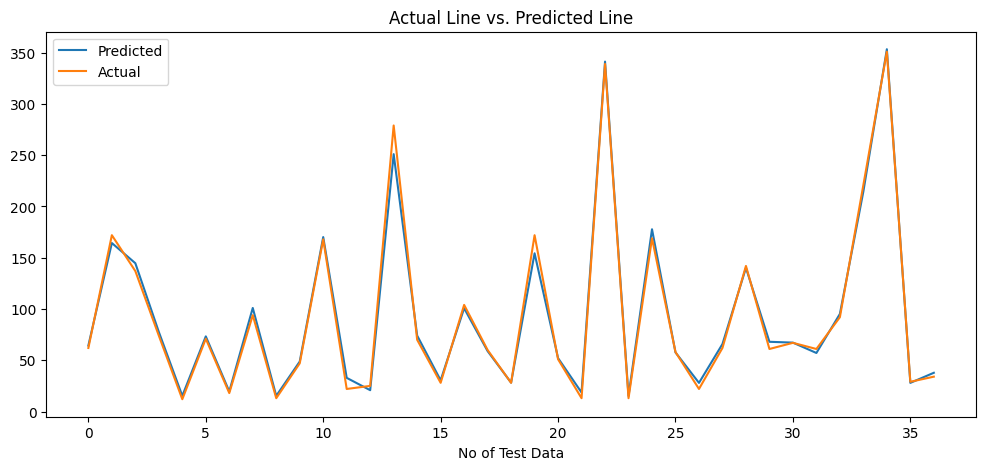

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(12,5)) # set figure size
plt.plot(ElasticNet_pred)          # plot predicted value
plt.plot(np.array(Y_test))  # plot actual value
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data') #set X-axis lable
plt.title('Actual Line vs. Predicted Line') #set plot title
plt.show() # display figure

In [ ]:
# Initialize lists to store metric names and values
metric_names = ['MAE', 'MSE', 'RMSE', 'R2_score']
metric_values_list = []

# Initialize index names for each set of predicted values
index_names = ['linear regression', 'Ridge regression','Lasso regression', 'Elasticnet regression']

# Loop through each set of predicted values
for pred_values in [y_pred, Ridg_pred,Lasso_pred , ElasticNet_pred]:
    metrics = {
        'MAE': round(mean_absolute_error(Y_test, pred_values), 4),
        'MSE': round(mean_squared_error(Y_test, pred_values), 4),
        'RMSE': round(np.sqrt(mean_squared_error(Y_test, pred_values)), 4),
        'R2_score': round(r2_score(Y_test, pred_values), 3)
    }
    metric_values_list.append(metrics)

# Create a DataFrame from the list of metric dictionaries
metrics_df = pd.DataFrame(metric_values_list,index=index_names)


In [ ]:
metrics_df

,MAE,MSE,RMSE,R2_score
linear regression,3.1911,18.7575,4.3310,0.998
Ridge regression,3.5155,24.1035,4.9095,0.997
Lasso regression,4.6420,41.9046,6.4734,0.994
Elasticnet regression,4.7206,49.2352,7.0168,0.994


In [ ]:
#sorting metrics
metrics_df.sort_values(by=['R2_score'],ascending=False,inplace=True)

In [ ]:
metrics_df

,MAE,MSE,RMSE,R2_score
linear regression,3.1911,18.7575,4.3310,0.998
Ridge regression,3.5155,24.1035,4.9095,0.997
Lasso regression,4.6420,41.9046,6.4734,0.994
Elasticnet regression,4.7206,49.2352,7.0168,0.994


#**Conclusion**


1. From 2016 to 2018 stock closing price increased but after year 2018, it started decreasing because of Rana Kapoor's case.

2. We got to know that data for dependent and independent variables are rightly skewed for we applied log transformation.

3. The log transformation successfully addressed the positive skewness observed in all features, ensuring adherence to the assumptions of the linear regression models.

4. The **metrics_df**  presents the evaluation metrics for three different regression models: Linear Regression, ElasticNet Regression, and Ridge Regression. Each model's performance has been assessed based on metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2_score).

Linear Regression:

Mean Absolute Error (MAE): 3.1911
Mean Squared Error (MSE): 18.7575
Root Mean Squared Error (RMSE): 4.3310
R-squared (R2) Score: 0.998
Linear regression has demonstrated excellent performance on this dataset, as indicated by the exceptionally low MAE, MSE, and RMSE values. The R-squared score of 0.998 suggests that the model explains a significant amount of the variance in the target variable.

Ridge Regression:

Mean Absolute Error (MAE): 3.5155
Mean Squared Error (MSE): 24.1035
Root Mean Squared Error (RMSE): 4.9095
R-squared (R2) Score: 0.997
Ridge regression slightly underperforms compared to linear regression in terms of the MAE, MSE, and RMSE. However, it still maintains a high R-squared score, indicating a good fit to the data.

Lasso Regression:

Mean Absolute Error (MAE): 4.6420
Mean Squared Error (MSE): 41.9046
Root Mean Squared Error (RMSE): 6.4734
R-squared (R2) Score: 0.994
Lasso regression exhibits higher errors (MAE, MSE, and RMSE) compared to both linear and ridge regression models. The R-squared score of 0.994 indicates that it still captures a substantial portion of the variance but is slightly less accurate.

ElasticNet Regression:

Mean Absolute Error (MAE): 4.7206
Mean Squared Error (MSE): 49.2352
Root Mean Squared Error (RMSE): 7.0168
R-squared (R2) Score: 0.994
ElasticNet regression performs similarly to Lasso regression in terms of error metrics and R-squared score. It has higher errors compared to linear and ridge regression.

##**Conclusion:**

#Linear regression is the best-performing model among the ones tested, with the lowest errors and the highest R-squared score. It provides a strong fit to the data and is a suitable choice if predictive accuracy is of utmost importance.

#Ridge regression also performs well and is a good alternative, especially if there are concerns about multicollinearity in the dataset.

#Lasso and ElasticNet regressions, while still providing reasonable results, have slightly higher errors and may not be the first choice unless feature selection or regularization is a specific requirement


#***THANK YOU !***